## 18.1 JetRail高铁的乘客数量预测

数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量
以每天为单位聚合数据集

### 18.1.1 数据预处理

#### 1 加载数据 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [5]:
# 数据加载
train = pd.read_csv('./train.csv')
# test = pd.read_csv('./test.csv')
print(train.head())
# print(test.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


#### 2 将时间字段转换为 datetime类型

In [6]:
# 将时间字段转换为 datetime类型
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
# test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [7]:
# test

#### 3 将Datatime作为train的索引

In [8]:
# 将Datatime作为train的索引
train.index = train.Datetime
# test.index = test.Datetime
train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2
...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702


In [9]:
# test

#### 4  去掉ID,Datetime字段

In [10]:
# 去掉ID,Datetime字段
train.drop(['ID','Datetime'], axis = 1, inplace = True)
# test.drop(['ID','Datetime'], axis = 1, inplace = True)

In [11]:
train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [12]:
# test

#### 5 按天进行采样

In [13]:
# 按天进行采样
daily_train = train.resample('D').sum()
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [14]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis = 1, inplace = True)

In [15]:
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


### 18.1.2 拟合Prophet模型

In [16]:
#拟合Prophet模型
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 18.1.3 预测

In [17]:
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-687.216303,-2336.405630,41.241165,-687.216303,-687.216303,-423.576256,-423.576256,-423.576256,-994.383343,-994.383343,-994.383343,570.807087,570.807087,570.807087,0.0,0.0,0.0,-1110.792559
1,2012-08-26,-679.114521,-2504.668014,-42.344883,-679.114521,-679.114521,-581.486251,-581.486251,-581.486251,-1143.350685,-1143.350685,-1143.350685,561.864434,561.864434,561.864434,0.0,0.0,0.0,-1260.600772
2,2012-08-27,-671.012739,-853.517841,1458.102095,-671.012739,-671.012739,1007.308260,1007.308260,1007.308260,457.250478,457.250478,457.250478,550.057783,550.057783,550.057783,0.0,0.0,0.0,336.295522
3,2012-08-28,-662.910957,-679.620452,1665.269689,-662.910957,-662.910957,1144.106545,1144.106545,1144.106545,607.909678,607.909678,607.909678,536.196867,536.196867,536.196867,0.0,0.0,0.0,481.195589
4,2012-08-29,-654.809174,-747.159273,1533.960395,-654.809174,-654.809174,1077.587083,1077.587083,1077.587083,556.476625,556.476625,556.476625,521.110459,521.110459,521.110459,0.0,0.0,0.0,422.777909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16251.283611,15358.463117,17797.904757,15839.569736,16627.927946,297.105356,297.105356,297.105356,556.476625,556.476625,556.476625,-259.371269,-259.371269,-259.371269,0.0,0.0,0.0,16548.388967
971,2015-04-23,16278.812096,15153.424281,17601.187205,15864.730819,16658.425986,64.225516,64.225516,64.225516,360.102667,360.102667,360.102667,-295.877151,-295.877151,-295.877151,0.0,0.0,0.0,16343.037613
972,2015-04-24,16306.340581,14814.881753,17406.090541,15891.261426,16689.182886,-181.012341,-181.012341,-181.012341,155.994580,155.994580,155.994580,-337.006921,-337.006921,-337.006921,0.0,0.0,0.0,16125.328240
973,2015-04-25,16333.869066,13694.225185,16198.863070,15918.290454,16720.980580,-1376.368599,-1376.368599,-1376.368599,-994.383343,-994.383343,-994.383343,-381.985256,-381.985256,-381.985256,0.0,0.0,0.0,14957.500467


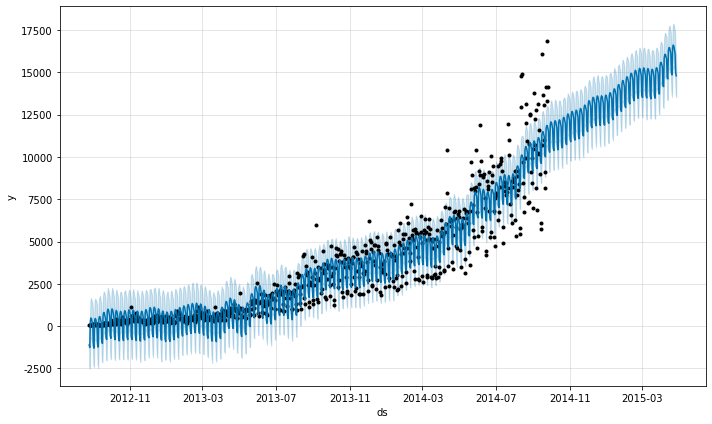

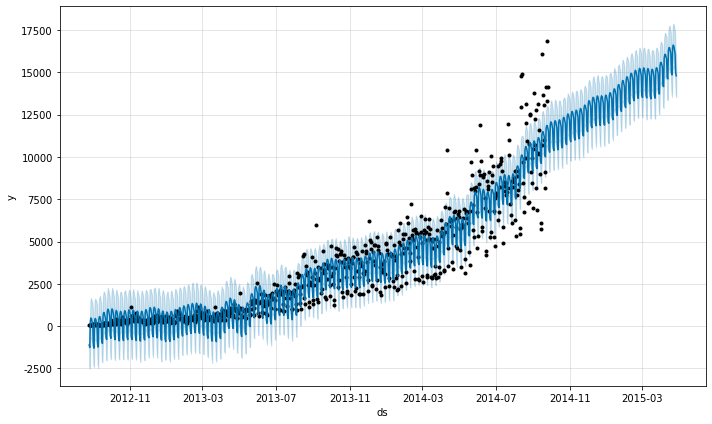

In [18]:
m.plot(forecast)

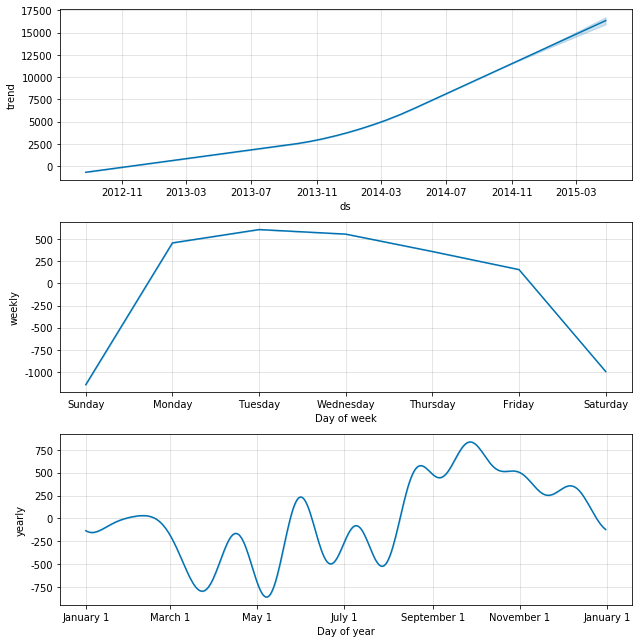

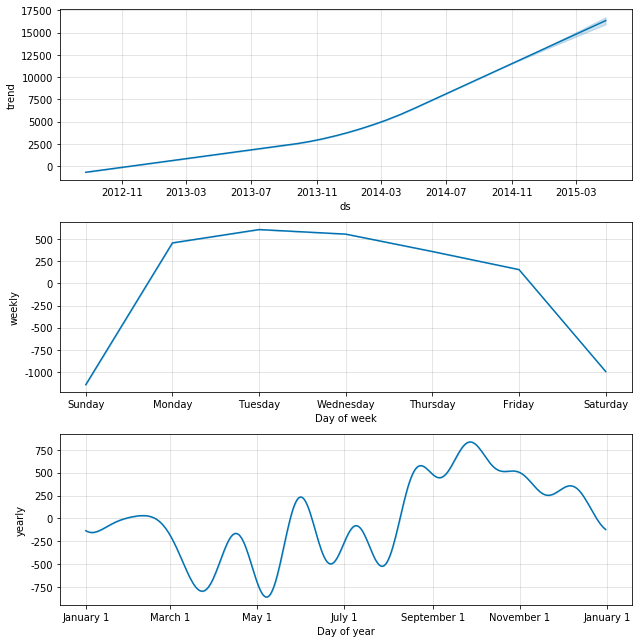

In [19]:
# 查看各个成分
m.plot_components(forecast)